# DETECCIÓN DE TRANSACCIONES FRAUDULENTAS CON TARJETAS BANCARIAS USANDO MACHINE LEARNING 

## `Masters Degree in Data Science`

# <font color='orange'>CUNEF</font>

## ASIGNACIÓN TFM 

 ### Ignacio González García-Valdés

#### -------------------

#### Target Variable 

The target variable for this dataset is the following: is_fraud

#### Assignment Objective

It is conceivable that we are dealing with a synthetic dataset designed to mimic a financial institution's card transaction dataset. Based on the available data, the primary goal of this task is to detect fraudulent transactions.

The main objective is to develop a model that can assess the probability of fraud for a given transaction. To achieve this, a thorough analysis of the data is necessary, including profiling, feature engineering, variable selection, and transformation. These steps are essential to gain insights into the underlying patterns and characteristics of fraudulent transactions.

By carefully examining the data and generating appropriate descriptors, we can create a robust model that effectively identifies and predicts the likelihood of fraud. The success of this endeavor relies on meticulous exploration, feature engineering, and comprehensive variable analysis to ensure the model's accuracy and reliability.

#### Notebook Objective

Within this document titled "03_Model," the primary focus will be on the preparation and implementation of the model. This stage involves a series of critical steps aimed at building a reliable and effective model to address the specific task at hand.

Firstly, the selection of an appropriate modeling technique or algorithm will be made, taking into account the nature of the problem and the characteristics of the dataset. This may involve exploring various options such as classification, regression, or clustering algorithms.

Once the model is chosen, it will be trained using the prepared dataset. This involves splitting the data into training and validation sets, applying the selected algorithm, and fine-tuning the model's parameters for optimal performance.

Furthermore, the model's performance will be evaluated using suitable metrics and techniques. This evaluation provides insights into how well the model generalizes to unseen data and helps identify areas for potential improvement.

Throughout the process, it is crucial to maintain a rigorous and iterative approach, continuously assessing and refining the model to achieve the desired results. The document will document the steps taken, decisions made, and outcomes observed, providing a comprehensive record of the model's development.

Ultimately, the purpose of this document is to guide and document the journey from data preparation to model implementation, ensuring a systematic and transparent approach to model development.

#### --------------------

#### Libraries

In [2]:
import pandas as pd 
import numpy as np
import shap
import eli5
from eli5.sklearn import PermutationImportance
import seaborn as sns

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 5000)

sns.set(rc = {'figure.figsize':(20,10)})

#### Warnings

In [3]:
import warnings

#### --------------------

In [10]:
%%capture
%run 02_Data_Preprocessing_v3.ipynb #import the notebook

In [4]:
%%capture
%run 03_Model_v2.ipynb #import the notebook

In [5]:
explainer = shap.Explainer(XGB)
shap_values = explainer(X_test_scaled)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


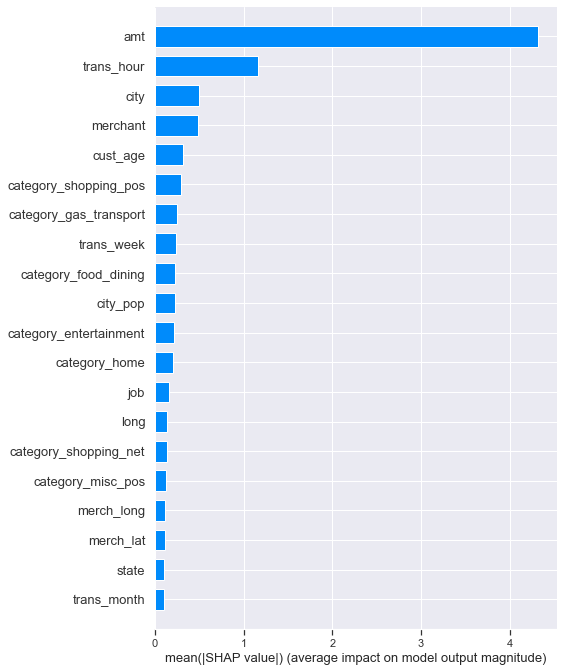

In [12]:
shap.summary_plot(shap_values, X_test_scaled, plot_type="bar")

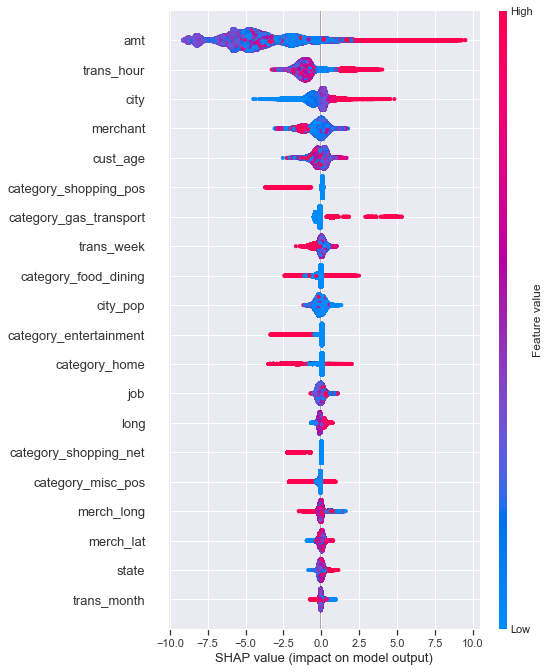

In [6]:
shap.summary_plot(shap_values, X_test_scaled) 

In [24]:
X_sampled = X_test_scaled.sample(200, random_state=seed)

In [19]:
shap.initjs()

In [25]:
shap_values = explainer.shap_values(X_sampled)

In [27]:
shap.force_plot(explainer.expected_value, shap_values[0,:], X_sampled.iloc[0,:], link='logit')

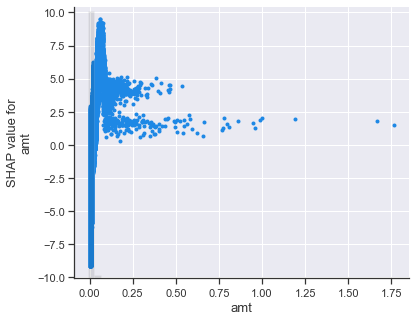

In [7]:
shap.plots.scatter(shap_values[:,'amt'])

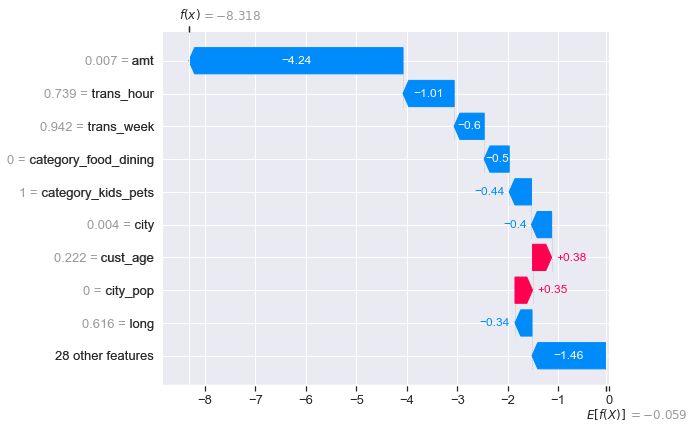

In [8]:
shap.plots.waterfall(shap_values[503])

In [11]:
perm = PermutationImportance(XGB, random_state=1).fit(X_test_scaled, Y_test)
eli5.show_weights(perm, feature_names = X.columns.tolist())

Weight,Feature
0.0513 ± 0.0002,amt
0.0230 ± 0.0001,category_gas_transport
0.0033 ± 0.0002,cust_age
0.0017 ± 0.0002,trans_hour
0.0014 ± 0.0001,category_home
0.0013 ± 0.0001,category_grocery_net
0.0013 ± 0.0001,category_grocery_pos
0.0010 ± 0.0001,category_travel
0.0007 ± 0.0001,city
0.0005 ± 0.0001,category_entertainment
